In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets


In [21]:
digits = datasets.load_digits(n_class=10)  #digits数据集保存的是1797个8x8的灰度值图像
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print X[:5,:]
print n_samples,n_features




[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]
 [  0.   0.   0.   4.  15.  12.   0.   0.   0.   0.   3.  16.  15.  14.
    0.   0.   0.   0.   8.  13.   8.  16.   0.   0.   0.   0.   1.   6.
   15.  11.   0.   0.   0.   1.   8.  13.  15.   1.   0.   0.   0.   9.
   16.  16.   5.   0.   0.   0.   0.   3.  13.  16.  16.  11.   5.   0.
    0.   0.   0.   3.  11.  16.   9.   0.]
 [  0. 

In [22]:
# Visualize the clustering
def plot_clustering(X_red, X, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

In [25]:
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(X_red)
    plot_clustering(X_red, X, clustering.labels_, "%s linkage" % linkage)

plt.show()


Computing embedding
Done.


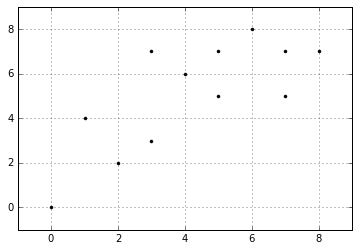

In [26]:
get_ipython().magic(u'matplotlib inline')
X0 = np.array([7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3])
X1 = np.array([5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7])
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0, X1, 'k.');

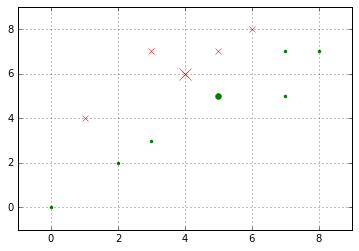

In [30]:
C1 = [1, 4, 5, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(4,6,'rx',ms=12.0)
plt.plot(5,5,'g.',ms=12.0);

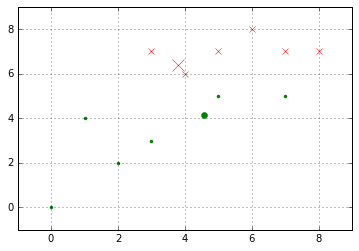

In [31]:
C1 = [1, 2, 4, 8, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(3.8,6.4,'rx',ms=12.0)
plt.plot(4.57,4.14,'g.',ms=12.0);

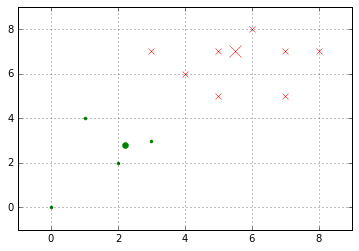

In [32]:
C1 = [0, 1, 2, 4, 8, 9, 10, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(5.5,7.0,'rx',ms=12.0)
plt.plot(2.2,2.8,'g.',ms=12.0);

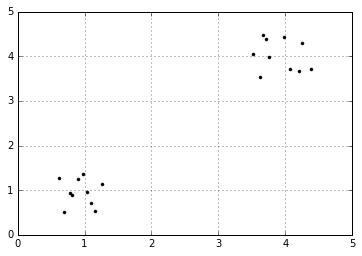

In [33]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
plt.figure()
plt.axis([0, 5, 0, 5])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.');


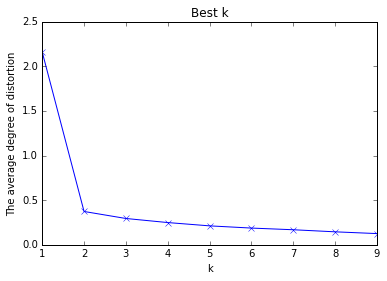

In [34]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('The average degree of distortion')
plt.title('Best k')

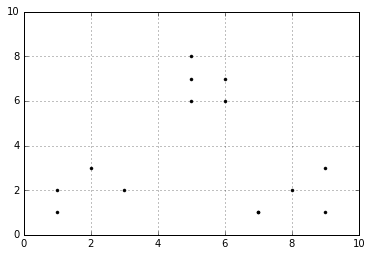

In [35]:
import numpy as np
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.figure()
plt.axis([0, 10, 0, 10])
plt.grid(True)
plt.plot(X[:,0],X[:,1],'k.');

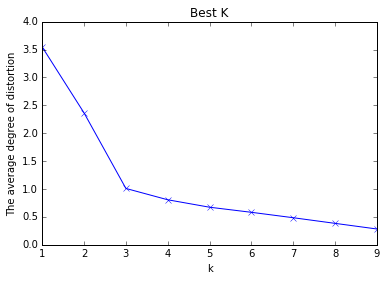

In [36]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('The average degree of distortion')
plt.title('Best K')


Populating the interactive namespace from numpy and matplotlib


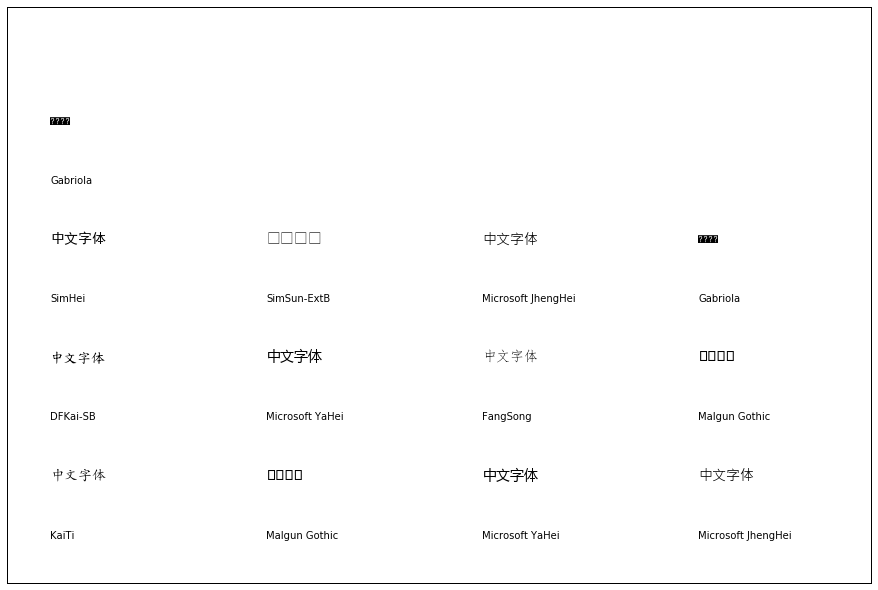

In [37]:
%pylab inline 
from matplotlib.font_manager import fontManager 
import matplotlib.pyplot as plt 
import os 
import os.path 
 
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
plt.subplots_adjust(0, 0, 1, 1, 0, 0) 
plt.xticks([]) 
plt.yticks([]) 
x, y = 0.05, 0.18 
fonts = [font.name for font in fontManager.ttflist if 
    os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts) 
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0)) 
for font in fonts: 
    t = ax.text(x, y, u"中文字体", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes) 
    x += 0.25 
    if x >= 1.0: 
        y += dy 
        x = 0.05 
plt.show() 